# Libraries imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cross_validation
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import Imputer
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,roc_auc_score,auc,precision_recall_curve
from sklearn.cluster import KMeans
from sklearn import svm,tree
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.utils import shuffle
from datetime import datetime, date, timedelta
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from numpy.random import vonmises
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import raw dataset

In [2]:
rawCardTable= pd.read_csv('data_for_student_case.csv')

# Preprocessing data
- Check % of fraudulent data
- Missing values treatment
    - check every column that has Nan
- Convert object types
- Convert simple_journal to binary variable


In [3]:
# first 5 rows
rawCardTable.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


In [4]:
# check types of data and missing values
rawCardTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

In [5]:
rawCardTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

### Missing values treatment

In [6]:
rawCardTable['issuercountrycode'].fillna(-1)
rawCardTable['bin'].fillna(-1)
rawCardTable['shoppercountrycode'].fillna(-1)
rawCardTable['temp']=np.where(rawCardTable['cvcresponsecode']==1, True, False)
rawCardTable['cardverificationcodesupplied']= rawCardTable['cardverificationcodesupplied'].fillna(rawCardTable['temp'])
rawCardTable.drop('temp', axis=1)
rawCardTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290382 entries, 0 to 290381
Data columns (total 18 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    290382 non-null bool
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id    

In [7]:
rawCardTable['bookingdate'] = pd.to_datetime(rawCardTable['bookingdate'])
rawCardTable['creationdate'] = pd.to_datetime(rawCardTable['creationdate'])
rawCardTable['onlydate'] = rawCardTable['creationdate'].dt.date
rawCardTable['time']= rawCardTable['creationdate'].dt.time

### Binary Label for target

In [8]:
def label (row):
    if row['simple_journal'] == 'Chargeback' :
        return 1
    if row['simple_journal'] == 'Refused' :
        return 2
    return 0

In [9]:
rawCardTable['target'] = rawCardTable.apply (lambda row: label (row),axis=1)
rawCardTable

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,...,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,temp,onlydate,time,target
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798,False,2015-07-01,23:03:11,1
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595,False,2015-07-02,04:50:55,1
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142,False,2015-07-02,14:30:28,1
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744,False,2015-07-03,07:53:37,1
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271,False,2015-07-08,18:35:35,1
5,6,2015-11-09 14:26:25,MX,visaclassic,493161.0,79900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-08 23:04:26,MexicoAccount,email243511,ip112410,card159816,False,2015-07-08,23:04:26,1
6,7,2015-11-09 14:26:47,MX,visaclassic,477291.0,69900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-09 02:31:36,MexicoAccount,email137086,ip83481,card251249,False,2015-07-09,02:31:36,1
7,8,2015-11-23 16:34:29,MX,mccredit,520416.0,129900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-09 04:56:48,MexicoAccount,email295644,ip66704,card70297,False,2015-07-09,04:56:48,1
8,9,2015-12-08 19:58:35,MX,visaclassic,477291.0,129900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-09 22:55:40,MexicoAccount,email115605,ip68088,card39791,False,2015-07-09,22:55:40,1
9,10,2015-11-09 14:25:50,MX,mccredit,549138.0,99900.0,MXN,MX,Ecommerce,Chargeback,...,0,2015-07-11 09:44:14,MexicoAccount,email182966,ip113025,card160922,False,2015-07-11,09:44:14,1


In [10]:
#check the Percentage of fraudulent transactions
benignTrans = len(rawCardTable[rawCardTable["target"]==0]) # benign transactions are represented by 0
fraudTrans = len(rawCardTable[rawCardTable["target"]==1]) # fraud by 1
mightTrans = len(rawCardTable[rawCardTable["target"]==2])
percBenignTrans = benignTrans/(fraudTrans+benignTrans+mightTrans)
print("percentage of benign  transaction is",percBenignTrans*100)
percMightTrans = mightTrans/(fraudTrans+benignTrans+mightTrans)
print("percentage of refused transaction is",percMightTrans*100)
percFraudTrans = fraudTrans/(fraudTrans+benignTrans+mightTrans)
print("percentage of fraud transaction",percFraudTrans*100)

percentage of benign  transaction is 81.51021757546955
percentage of refused transaction is 18.37097340744261
percentage of fraud transaction 0.11880901708783602


# Convert categorical variables

In [11]:
# convert everything to the same currency
currency_dict = {'MXN': 0.01*0.05, 'SEK': 0.01*0.11, 'AUD': 0.01*0.67, 'GBP': 0.01*1.28, 'NZD': 0.01*0.61}
def convert(cur,amount):
    return (currency_dict[cur]*amount)

rawCardTable['euro'] = rawCardTable.apply(lambda row: convert(row['currencycode'],row['amount']),axis=1)

In [12]:
#cardTableProc = cardTable.rename(index=str, columns = {'txvariantcode': 'cardtype', 'bin': 'issuer_id', 'shopperinteraction': 'shoppingtype',
#                   'simple_journal': 'label', 'cardverificationcodesupplied': 'cvcsupply', 
#                  'cvcresponsecode': 'cvcresponse', 'accountcode': 'merchant_id'})

#cardTableProc
issuercountrycode_category = pd.Categorical.from_array(rawCardTable['issuercountrycode'])
cardtype_category = pd.Categorical.from_array(rawCardTable['txvariantcode'])
issuer_id_category = pd.Categorical.from_array(rawCardTable['bin'])
currencycode_category = pd.Categorical.from_array(rawCardTable['currencycode'])
shoppercountrycode_category = pd.Categorical.from_array(rawCardTable['shoppercountrycode'])
shoppingtype_category = pd.Categorical.from_array(rawCardTable['shopperinteraction'])
cvcsupply_category = pd.Categorical.from_array(rawCardTable['cardverificationcodesupplied'])
merchant_id_category = pd.Categorical.from_array(rawCardTable['accountcode'])
mail_id_category = pd.Categorical.from_array(rawCardTable['mail_id'])
ip_id_category = pd.Categorical.from_array(rawCardTable['ip_id'])
card_id_category = pd.Categorical.from_array(rawCardTable['card_id'])

issuercountrycode_dict = dict(set(zip(issuercountrycode_category, issuercountrycode_category.codes)))
cardtype_dict = dict(set(zip(cardtype_category, cardtype_category.codes)))
currencycode_dict = dict(set(zip(currencycode_category, currencycode_category.codes)))
shoppercountrycode_dict = dict(set(zip(shoppercountrycode_category, shoppercountrycode_category.codes)))
shoppingtype_dict = dict(set(zip(shoppingtype_category, shoppingtype_category.codes)))
cvcsupply_dict = dict(set(zip(cvcsupply_category, cvcsupply_category.codes)))
merchant_id_dict = dict(set(zip(merchant_id_category, merchant_id_category.codes)))
mail_id_dict = dict(set(zip(mail_id_category, mail_id_category.codes)))
ip_id_dict = dict(set(zip(ip_id_category, ip_id_category.codes)))
card_id_dict = dict(set(zip(card_id_category, card_id_category.codes)))



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  # This is added back by InteractiveShellApp.init

In [13]:
catCardTable = rawCardTable

In [14]:
## definir que colunas da data para classificador
#toClassifyCardTable = ..
catCardTable['issuercountrycode'] = issuercountrycode_category.codes
catCardTable['txvariantcode'] = cardtype_category.codes
catCardTable['bin'] = currencycode_category.codes
catCardTable['shoppercountrycode'] = shoppercountrycode_category.codes
catCardTable['shopperinteraction'] = shoppingtype_category.codes
catCardTable['cardverificationcodesupplied'] = cvcsupply_category.codes
catCardTable['accountcode'] = merchant_id_category.codes
catCardTable['mail_id'] = mail_id_category.codes
catCardTable['ip_id'] = ip_id_category.codes
catCardTable['card_id'] = card_id_category.codes
catCardTable['label_int'], catCardTable['cvcresponse_int']= 0,0


catCardTable['cvcresponse_int'] = map(lambda x:3 if x > 2 else x+0, catCardTable['cardverificationcodesupplied'])
#0 = Unknown, 1=Match, 2=No Match, 3=Not checked
## remove all REFUSED transactions
catCardTable['bin'] = catCardTable['bin'].astype(int)
catCardTable['target'] = catCardTable['target'].astype(int)
catCardTable['euro'] = catCardTable['euro'].astype(float)
unFilteredCardTable = catCardTable 
catCardTable = catCardTable.ix[(catCardTable['target']==1) | (catCardTable['target']==0)]#237036 instances



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# Without AggregatedFeatures

In [15]:
catCardTable.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 237036 entries, 0 to 290381
Data columns (total 24 columns):
txid                            237036 non-null int64
bookingdate                     237036 non-null datetime64[ns]
issuercountrycode               237036 non-null int16
txvariantcode                   237036 non-null int8
bin                             237036 non-null int64
amount                          237036 non-null float64
currencycode                    237036 non-null object
shoppercountrycode              237036 non-null int16
shopperinteraction              237036 non-null int8
simple_journal                  237036 non-null object
cardverificationcodesupplied    237036 non-null int8
cvcresponsecode                 237036 non-null int64
creationdate                    237036 non-null datetime64[ns]
accountcode                     237036 non-null int8
mail_id                         237036 non-null int32
ip_id                           237036 non-null int32
card_id

# Aggregated Features

In [16]:
#Aggregating features and everything with zeros

aggCols=['LastTransactionin2hrsr','SuspShopInt','SuspCardVerif','SuspCVCCode','IPChange','AmountChange']
aggregatedFeatures = pd.DataFrame(0, index=np.arange(0,catCardTable.shape[0]),columns=aggCols)
catCardTable.reset_index(drop=True, inplace=True)
aggregatedFeatures.reset_index(drop=True, inplace=True)
aggCardTable = pd.concat([catCardTable,aggregatedFeatures],axis=1)

aggCardTable

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,...,target,euro,label_int,cvcresponse_int,LastTransactionin2hrsr,SuspShopInt,SuspCardVerif,SuspCVCCode,IPChange,AmountChange
0,1,2015-11-09 14:26:51,92,3,2,64800.0,MXN,103,1,Chargeback,...,1,32.4000,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
1,2,2015-11-09 14:27:38,92,3,2,44900.0,MXN,103,1,Chargeback,...,1,22.4500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
2,3,2015-11-23 16:34:16,92,3,2,149900.0,MXN,103,1,Chargeback,...,1,74.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
3,4,2015-11-23 16:34:51,92,3,2,109900.0,MXN,103,1,Chargeback,...,1,54.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
4,5,2015-11-09 14:26:08,92,7,2,89900.0,MXN,103,1,Chargeback,...,1,44.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
5,6,2015-11-09 14:26:25,92,7,2,79900.0,MXN,103,1,Chargeback,...,1,39.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
6,7,2015-11-09 14:26:47,92,7,2,69900.0,MXN,103,1,Chargeback,...,1,34.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
7,8,2015-11-23 16:34:29,92,3,2,129900.0,MXN,103,1,Chargeback,...,1,64.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
8,9,2015-12-08 19:58:35,92,7,2,129900.0,MXN,103,1,Chargeback,...,1,64.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0
9,10,2015-11-09 14:25:50,92,3,2,99900.0,MXN,103,1,Chargeback,...,1,49.9500,0,<map object at 0x1a1e31db00>,0,0,0,0,0,0


In [17]:
# A lot of costumers with no history, so we split the data to keep performance
freq=aggCardTable["card_id"].value_counts()
cards_with_history = freq.index[freq>1].tolist()

In [18]:
dataNoHistory = aggCardTable[~aggCardTable["card_id"].isin(cards_with_history)]
dataWithHistory = aggCardTable[aggCardTable["card_id"].isin(cards_with_history)]

In [19]:
def prev_interaction(df):
    previousline = df.shift(1)
    df['prevShopperInteraction'] = previousline['shopperinteraction']
    df['prevDate'] = previousline['creationdate']
    df['prevCardSup'] =previousline['cardverificationcodesupplied']
    df['prevCvcRes'] = previousline['cvcresponsecode']
    df['prevAmount'] = previousline['amount']
    df['prevIP']= previousline['ip_id']
    return df

In [20]:
#Fill the aggregated features columns
def fillAggregatedColumns(row):
    if (row["shopperinteraction"]=="ContAuth" and row["prevShopperInteraction"]=="Ecommerce"):
        row["SuspShopInt"]=1
    if (row["cardverificationcodesupplied"]==False and row["prevCardSup"]==True):
        row["SuspCardVerif"]=1
    if (row["cvcresponsecode"]==0 and row["prevCvcRes"]==1):
        row["SuspCVCCode"]=1
    if row["prevIP"]!=0:
        if (row["ip_id"] != row["prevIP"]):
            row["IPChange"]=1
    if row["prevAmount"]!=0:
        row["AmountChange"]=(row["amount"]-row["prevAmount"])/row["prevAmount"]
    if row["prevDate"]!=0:
        if (row["creationdate"]-row["prevDate"]).seconds < 3600*2:
            row["LastTransactionin2hrs"]=1
    return row

intermediateTable= dataWithHistory.groupby(dataWithHistory['card_id']).apply(prev_interaction)
intermediateTable[['prevShopperInteraction','prevDate','prevCardSup','prevCvcRes','prevAmount','prevIP']] = intermediateTable[['prevShopperInteraction','prevDate','prevCardSup','prevCvcRes','prevAmount','prevIP']].fillna(value=0)
intermediateTable=intermediateTable.apply(fillAggregatedColumns,axis=1)
dataNoHistory
#remove intermediate columns that now are unnecessary
dataWithHistory = intermediateTable.drop(['prevShopperInteraction', 'prevDate', 'prevCardSup', 'prevCvcRes',
       'prevAmount', 'prevIP'],axis=1)

aggCardTable = pd.concat([dataWithHistory,dataNoHistory],axis = 0)

In [21]:
# backup tables
dataWithHistory.to_csv('dataWithHistory.csv')
dataNoHistory.to_csv('dataNoHistory.csv')
catCardTable.to_csv('catCardTable.csv')
aggCardTable.to_csv('aggCardTable.csv')
unFilteredCardTable.to_csv('unFilteredCardTable.csv')

# Data Visualization
- Correlations between features
- ..

In [22]:
analysisTable = aggCardTable[['IPChange','SuspShopInt','txvariantcode','shopperinteraction','mail_id','ip_id','issuercountrycode','accountcode','euro','card_id','SuspCVCCode','SuspCardVerif','target']]

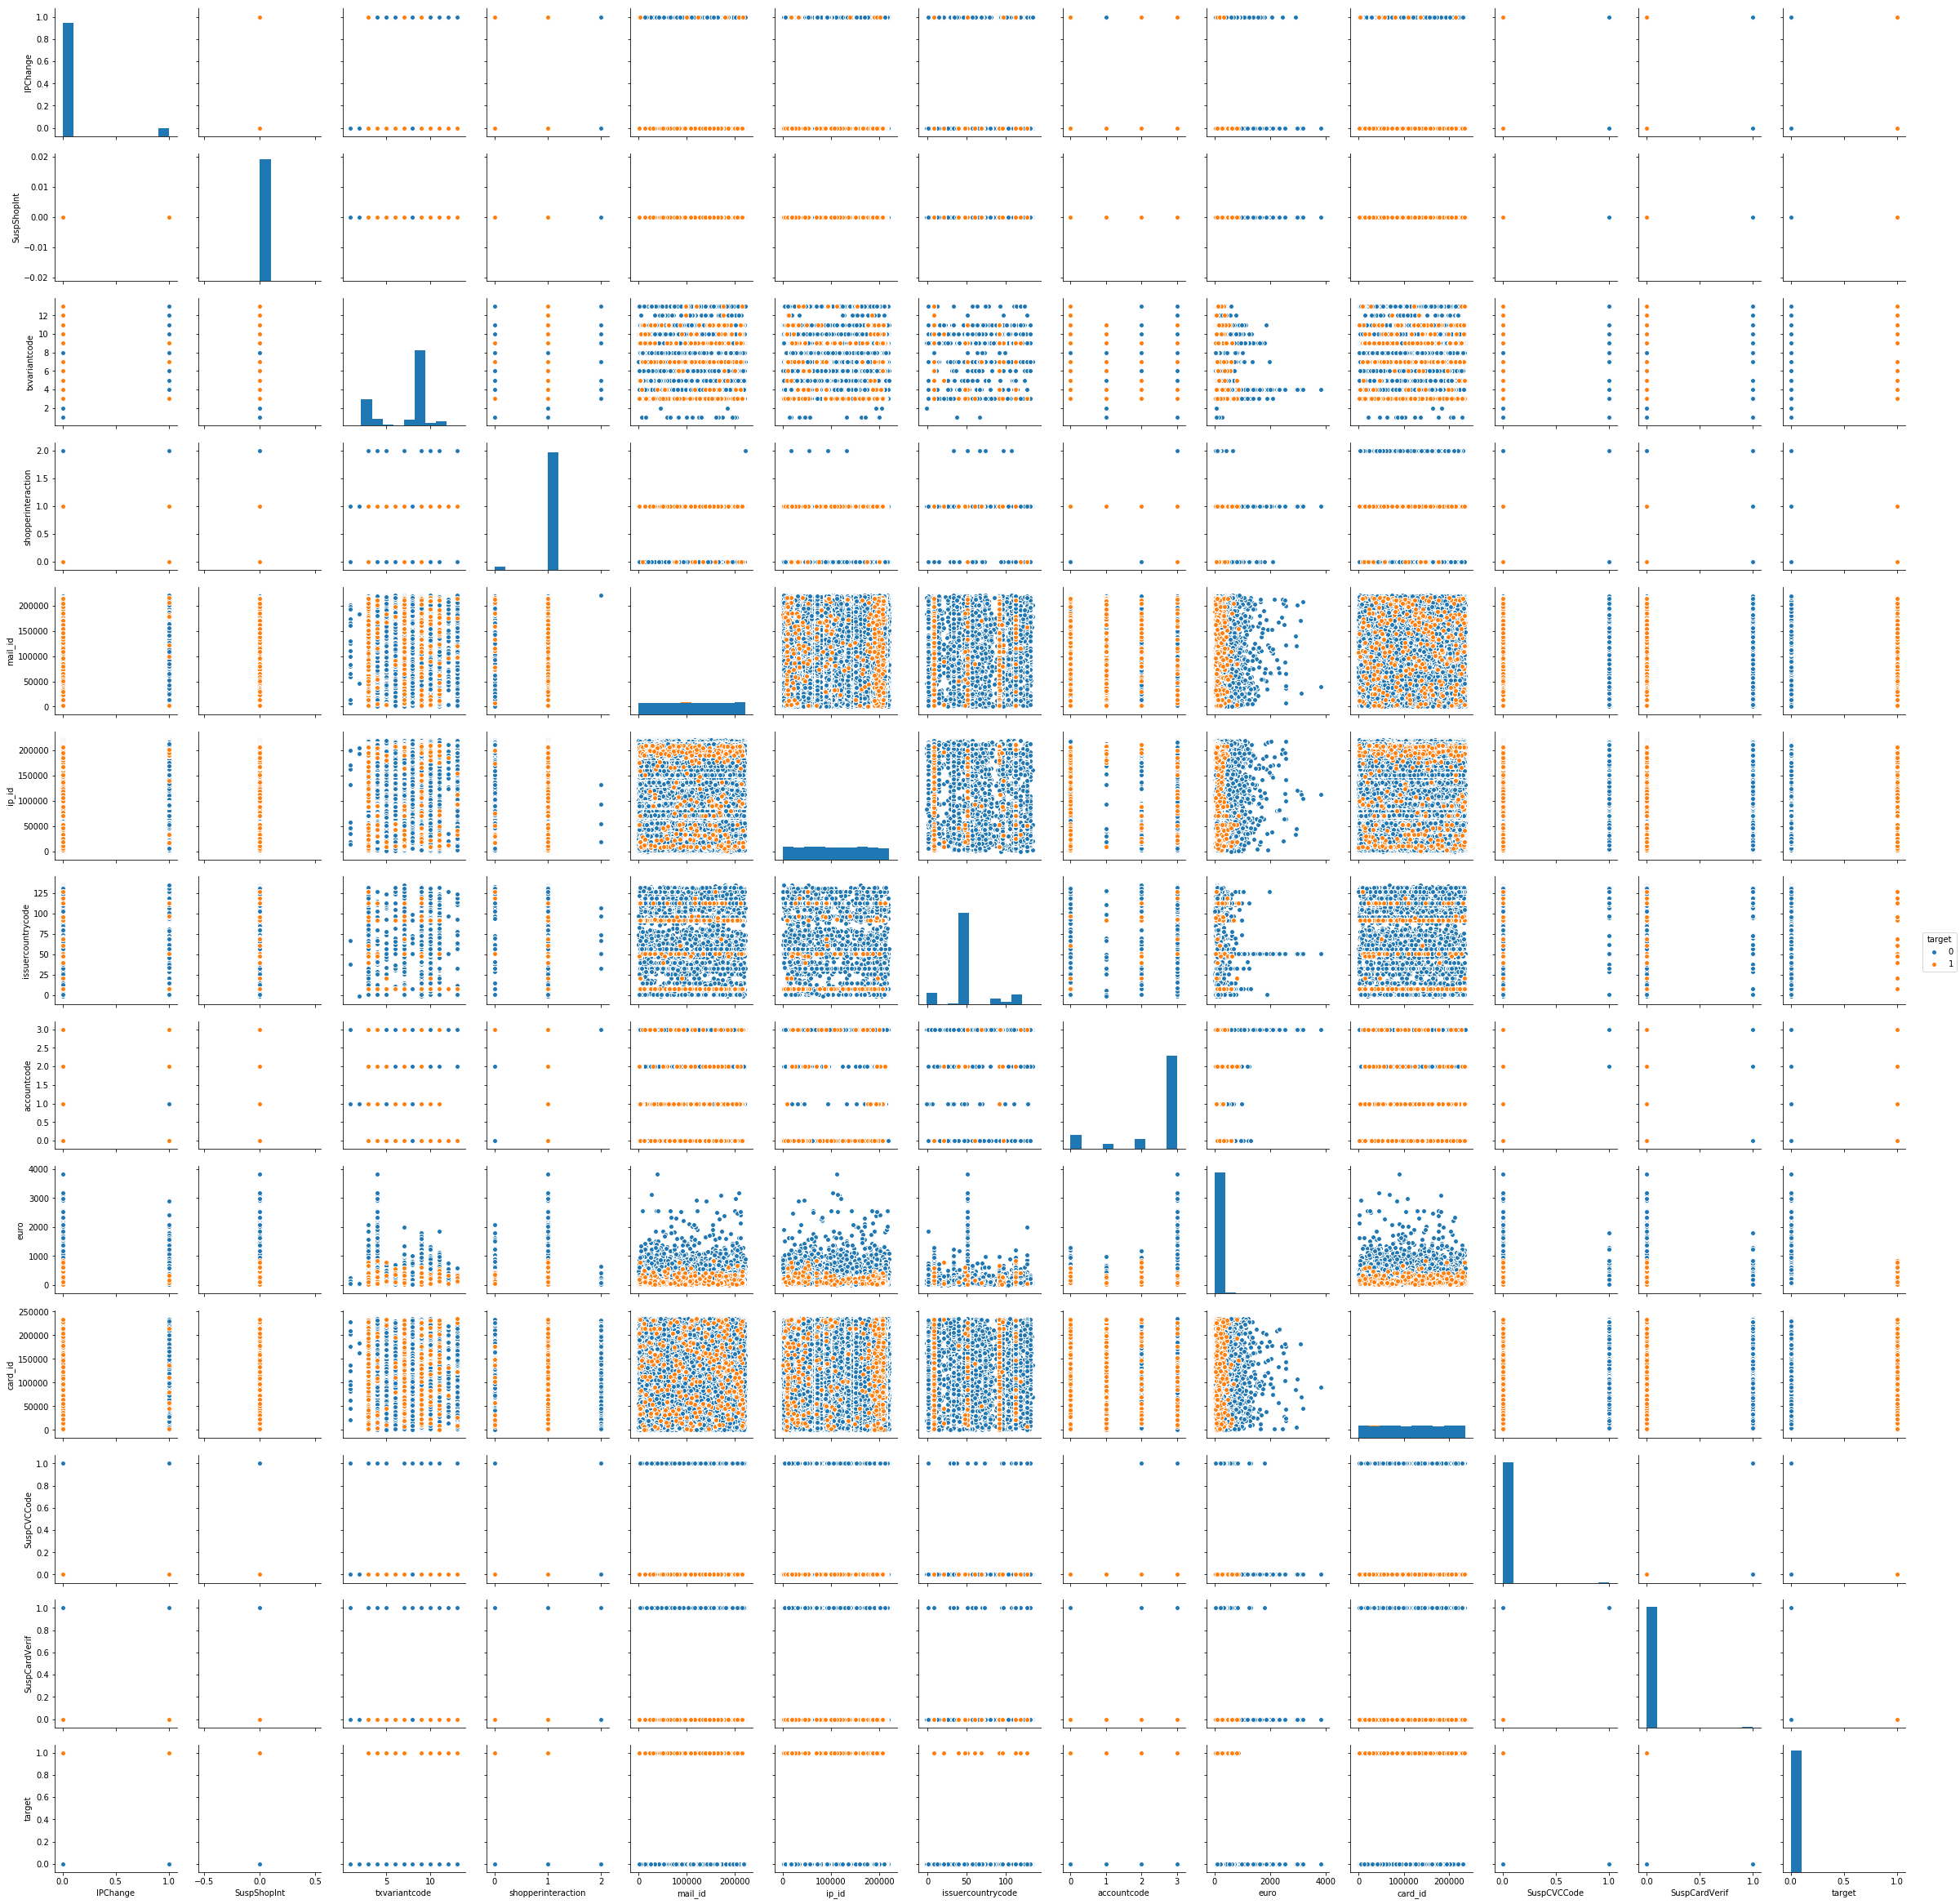

In [23]:
sns.pairplot(analysisTable, hue="target")

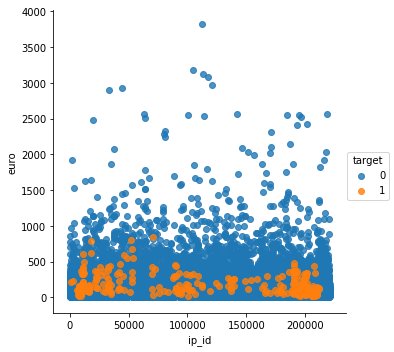

In [24]:
analysisTable = shuffle(analysisTable)
sns.lmplot(x="ip_id", y="euro", hue="target", fit_reg=False, data=analysisTable)

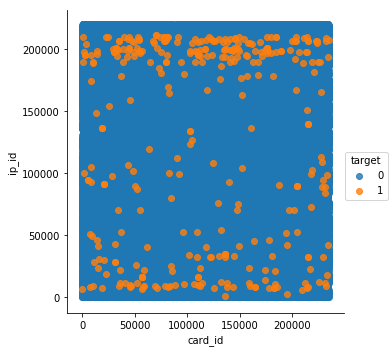

In [25]:
analysisTable = shuffle(analysisTable)
sns.lmplot(x="card_id", y="ip_id", hue="target", fit_reg=False, data=analysisTable)

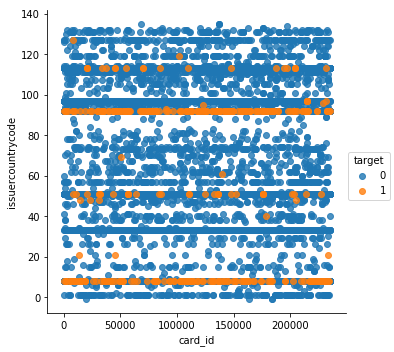

In [26]:
analysisTable = shuffle(analysisTable)
sns.lmplot(x="card_id", y="issuercountrycode", hue="target", fit_reg=False, data=analysisTable)

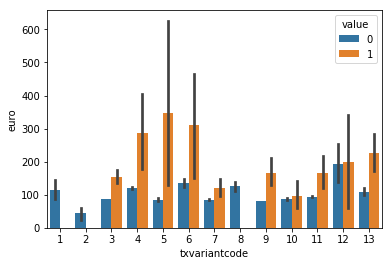

In [27]:
long_df = pd.melt(analysisTable,id_vars = ['euro','txvariantcode'],value_vars =['target'])
my_plot = sns.barplot(x="txvariantcode", y="euro",hue = "value", data=long_df)


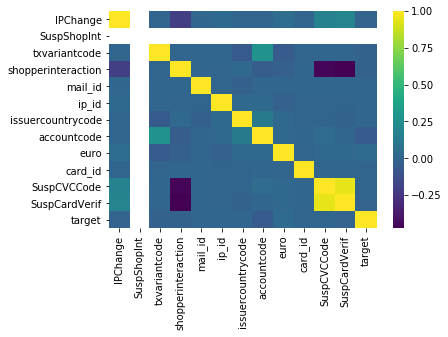

In [28]:
corr_matrix=analysisTable.corr()

sns.heatmap(corr_matrix, cmap='viridis')

In [29]:
# Checkpoint: backup table
analysisTable.to_csv('toAnalyzeTable.csv')

# Get Analysis Table
   

In [30]:
# Checkpoint
#analysisTable = pd.read_csv('toAnalyzeTable.csv')
#analysisTable = analysisTable[analysisTable.columns[1:]]

## Shuffle Data

In [31]:
features = analysisTable[analysisTable.columns[1:-1]]
features = shuffle(features)
target = analysisTable[analysisTable.columns[-1]]
target = shuffle(target)

In [32]:
features

,SuspShopInt,txvariantcode,shopperinteraction,mail_id,ip_id,issuercountrycode,accountcode,euro,card_id,SuspCVCCode,SuspCardVerif
136845,0,9,1,114572,228,51,3,81.792,2715,0,0
79240,0,9,1,138516,193565,51,3,62.656,220075,0,0
233352,0,9,1,175245,71358,113,2,54.890,182616,0,0
60901,0,9,1,54308,2162,51,3,81.856,54783,0,0
80693,0,9,1,54850,172373,51,3,124.096,100221,0,0
74670,0,9,0,147596,155277,51,3,47.552,131488,0,0
171314,0,9,1,186706,93794,51,3,58.816,122182,0,0
190735,0,9,0,66560,43280,51,3,40.576,901,0,0
72356,0,9,1,144018,85803,51,3,128.512,112840,0,0
35345,0,9,1,143347,105653,8,0,79.395,165663,0,0


In [33]:
TP, FP, FN, TN = 0, 0, 0, 0
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=43)


In [41]:
analysisTable = shuffle(analysisTable)
def test_Folds(folds,par,smo,cutoff):
   
    # data is an array with our already pre-processed dataset examples
    TN,FP,FN,TP = 0,0,0,0
    kf = KFold(n_splits=folds)
    sum = 0
    
    ###ROC Curves
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    
    #CROSS VALIDATION
    for train, test in kf.split(analysisTable):
        train_data = np.array(analysisTable)[train]
        #train_data = pd.DataFrame(train_data)
        test_data = np.array(analysisTable)[test]
        #test_data = pd.DataFrame(test_data)
        y_train = train_data[:,-1]
        x_train = train_data[:,:-1]

        y_test = test_data[:,-1]
        x_test = test_data[:,:-1]
        
        #RANDOM UNDERSAMPLER
        if smo == 0 :
            sampler = RandomUnderSampler(ratio='majority')
        ## SMOTE
        elif smo == 1 :
            sampler= SMOTE(random_state=43)  
        ## Tomek Links
        elif smo == 2 :
            sampler = SMOTETomek()
        
        if par == 'rf':
            Clf = RandomForestClassifier(n_estimators=40, criterion='gini')
        elif par == 'dt':
            Clf = tree.DecisionTreeClassifier()
        elif par == 'lr':
            Clf= LogisticRegression()
        elif par == 'svm':
            Clf = RandomForestClassifier(n_estimators=2, criterion='gini')
            
        #TRAIN CLASSIFIER
        if smo!=3:
            x_train, y_train = sampler.fit_sample(x_train, y_train)
        
        Clf.fit(x_train,y_train)
        
        #TEST CLASSIFIER
        predict_proba = Clf.predict_proba(x_test)
        y_predict = (predict_proba[:,1]>cutoff).astype(int)
        
        #ROC CURVE
        fpr, tpr, thresh = roc_curve(y_test, predict_proba[:,1])
        roc_auc = auc(fpr, tpr)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #PLOT CURVE

        #plt.plot(fpr, tpr, lw=1, alpha=0.3)

        precision, recall, thresholds2 = precision_recall_curve(y_test, predict_proba[:,1])
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label = str(par) + '' + str(folds) + 'folds')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR Curve')
       
        fTN,fFP,fFN,fTP = confusion_matrix(y_test, y_predict).ravel()  
        
        TN += fTN
        FP += fFP
        FN += fFN
        TP += fTP
        
        print ('TP: '+ str(fTP))
        print ('FP: '+ str(fFP))
        print ('FN: '+ str(fFN))
        print ('TN: '+ str(fTN))
        i += 1
    
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.subplot(1, 2, 1)
    

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.plot(mean_fpr, mean_tpr,
         label=roc,
         lw=2, alpha=.8)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print ('TP: '+ str(TP))
    print ('FP: '+ str(FP))
    print ('FN: '+ str(FN))
    print ('TN: '+ str(TN))
    plt.show()
    return (mean_fpr,mean_tpr)

TP: 172
FP: 34524
FN: 15
TN: 83807


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 148
FP: 50286
FN: 10
TN: 68074


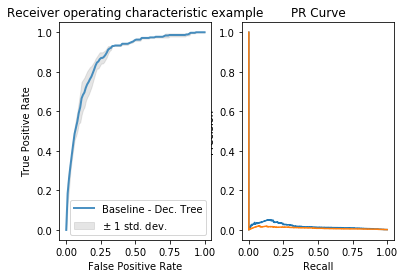

TP: 320
FP: 84810
FN: 25
TN: 151881
TP: 177
FP: 26355
FN: 10
TN: 91976


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 151
FP: 24532
FN: 7
TN: 93828


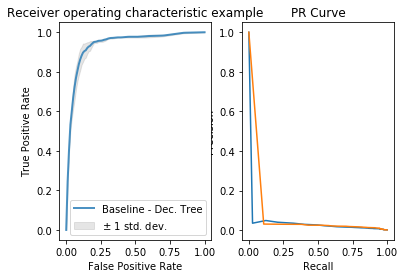

TP: 328
FP: 50887
FN: 17
TN: 185804
TP: 165
FP: 22725
FN: 22
TN: 95606
TP: 133
FP: 19486
FN: 25
TN: 98874


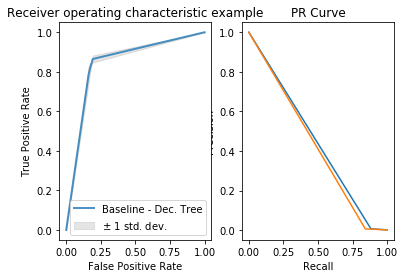

TP: 298
FP: 42211
FN: 47
TN: 194480
TP: 174
FP: 34368
FN: 13
TN: 83963


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 148
FP: 47570
FN: 10
TN: 70790


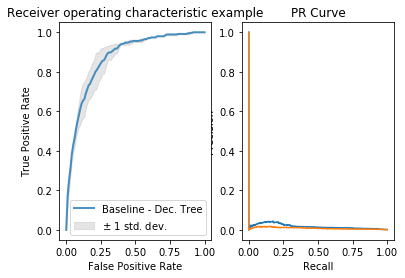

TP: 322
FP: 81938
FN: 23
TN: 154753
TP: 33
FP: 338
FN: 154
TN: 117993


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 30
FP: 355
FN: 128
TN: 118005


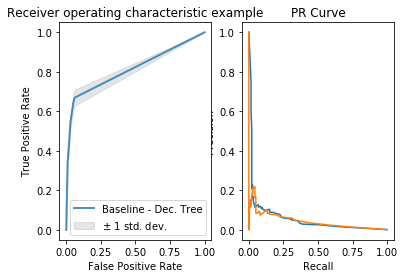

TP: 63
FP: 693
FN: 282
TN: 235998
TP: 25
FP: 345
FN: 162
TN: 117986


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 24
FP: 331
FN: 134
TN: 118029


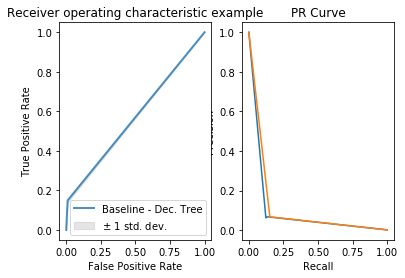

TP: 49
FP: 676
FN: 296
TN: 236015
TP: 0
FP: 0
FN: 187
TN: 118331
TP: 0
FP: 0
FN: 158
TN: 118360


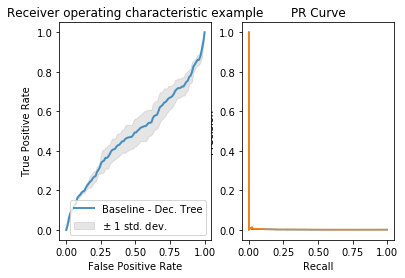

TP: 0
FP: 0
FN: 345
TN: 236691
TP: 15
FP: 6
FN: 172
TN: 118325


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 18
FP: 13
FN: 140
TN: 118347


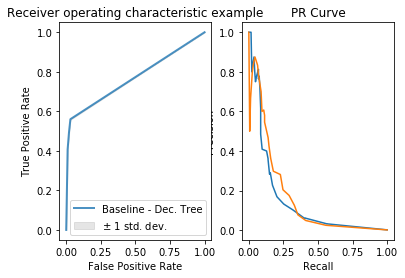

TP: 33
FP: 19
FN: 312
TN: 236672
TP: 23
FP: 165
FN: 164
TN: 118166
TP: 23
FP: 192
FN: 135
TN: 118168


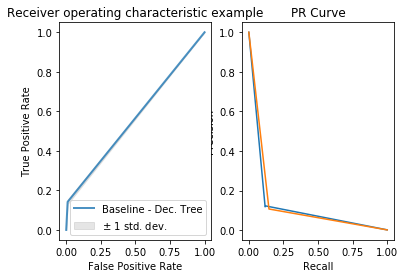

TP: 46
FP: 357
FN: 299
TN: 236334


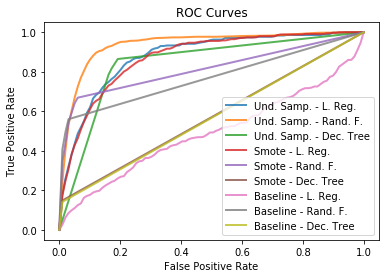

In [ ]:
res={}
trans = {0:"Und. Samp.",1:"Smote",3:"Baseline","lr":"L. Reg. ","rf":"Rand. F.","dt":"Dec. Tree"}
for smote in [0,1,3]:
    for clf in ["lr","rf","dt"]:
        res[str(trans[smote]) +" - "+trans[clf]]=test_Folds(2,clf,smote,0.3)
for roc in res:
    plt.plot(res[roc][0], res[roc][1],
         label=roc,
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_Folds(10,'rf',1,0.3)

In [ ]:
test_Folds(10,'rf',1,0.255)

In [ ]:
test_Folds(10,'rf',1,0.245)

In [ ]:
test_Folds(10,'rf',0,0.98)

In [ ]:
test_Folds(10,'rf',1,0.25)

In [ ]:
test_Folds(10,'rf',1,0.249)

In [ ]:
# best performance
test_Folds(10,'rf',2,0.24)

TP: 8
FP: 99
FN: 36
TN: 23561


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TP: 11
FP: 113
FN: 32
TN: 23548


In [ ]:
test_Folds(10,'lr',2,0.6)

In [ ]:
test_Folds(10,'lr',1,0.6)